# Learn to use Auto-Sklearn

In [ ]:
# print autosklearn version
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)

## Regression Model
The following example shows how to fit a simple regression model with auto-sklearn.

In [1]:
import sklearn.datasets
import sklearn.metrics
import autosklearn.regression

/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


### 1. Data Loading

In [2]:
# Load a example dataset
X, Y = sklearn.datasets.load_boston(return_X_y=True)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state=1)

### 2. Build and fit a regressor

In [16]:
# Create Regression
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=120,
                                                     per_run_time_limit=30,
                                                     tmp_folder='../tmp/autosklearn_regression_example_tmp',
                                                     output_folder='../output/autosklearn_regression_example_out')
# Train model
automl.fit(X_train, Y_train, dataset_name='boston')

/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)
/Users/amanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(dask_client=None,
                     delete_output_folder_after_terminate=True,
                     delete_tmp_folder_after_terminate=True,
                     disable_evaluator_output=False, ensemble_nbest=50,
                     ensemble_size=50, exclude_estimators=None,
                     exclude_preprocessors=None, get_smac_object_callback=None,
                     include_estimators=None, include_preprocessors=None,
                     initial_configurations_via_metale...
                     max_models_on_disc=50, memory_limit=3072,
                     metadata_directory=None, metric=None, n_jobs=None,
                     output_folder='../output/autosklearn_regression_example_out',
                     per_run_time_limit=30, resampling_strategy='holdout',
                     resampling_strategy_arguments=None, seed=1,
                     smac_scenario_args=None, time_left_for_this_task=120,
                     tmp_folder='../tmp/autosklearn_reg

### 3. Print the final ensemble constructed by auto-sklearn

In [19]:
print('\n\n--- MODELS: ---')
print(automl.show_models())



--- MODELS: ---
[(0.520000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'select_rates_regression', 'regressor:__choice__': 'adaboost', 'feature_preprocessor:select_rates_regression:alpha': 0.13294870400704156, 'feature_preprocessor:select_rates_regression:mode': 'fwe', 'feature_preprocessor:select_rates_regression:score_func': 'f_regression', 'regressor:adaboost:learning_rate': 0.47982456668237294, 'regressor:adaboost:loss': 'square', 'regressor:adaboost:max_depth': 10, 'regressor:adaboost:n_estimators': 143},
dataset_properties={
  'task': 4,
  'sparse': False,
  'multioutput': False,
  'target_type': 'regression',
  'signed': False})),

### 4. Predict and get the Score of the final ensemble
In a Regression model the appropriate statistics to check how good is out model is the R^2 score.

In [47]:
predictions = automl.predict(X_test)
print("R2 score:", sklearn.metrics.r2_score(Y_test, predictions))

R2 score: 0.8896401516617914


### 5. Visualization Data

In [52]:
import matplotlib.pyplot as plt

(array([ 6., 20., 28., 31., 18.,  5.,  8.,  7.,  0.,  4.]),
 array([ 8.3501209 , 12.39742357, 16.44472623, 20.49202889, 24.53933156,
        28.58663422, 32.63393688, 36.68123955, 40.72854221, 44.77584487,
        48.82314754]),
 <a list of 10 Patch objects>)

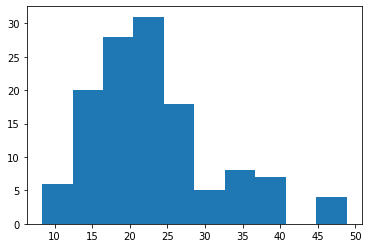

In [53]:
plt.hist(predictions)